# Loan Data from Prosper : Communicate findings
## by Parvin Mammadov



## Investigation Overview


In this investigation, the purpose is to check the characteristics of loans that could be used to predict  interactions among features. The central concentration was on the original loan amount, borrower rate, employmet status, loan term, borrower's stated monthly income.



## Dataset Overview

The dataset contains 113,937 loans with 81 features.I expect that the 13 features that I select in df will help to support the investigation. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, loan status etc.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
target_columns = ['Term', 'LoanStatus', 'BorrowerRate','LoanOriginalAmount','ListingCategory (numeric)','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans','LoanOriginationDate', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Recommendations','Investors']
df2 = df[target_columns]
# descriptive statistics for numeric variables
df2.describe()
# Droping NA
df2 = df2.dropna(subset=['ProsperRating (Alpha)']).reset_index()
# changing date type to pd.datetime
df2['LoanOriginationDate'] = pd.to_datetime(df2['LoanOriginationDate'])
# Filling NA with 0
df2['TotalProsperLoans'] = df2['TotalProsperLoans'].fillna(0)
df3 = df2.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Checking of Loan Status

The biggest part of the loans are current loans,past due loans are divided several groups based on the lenght of payment delay. Accordingly the second biggest group is completed loans and chargedoff compromise significant proportion and defaulted loans look very rare.

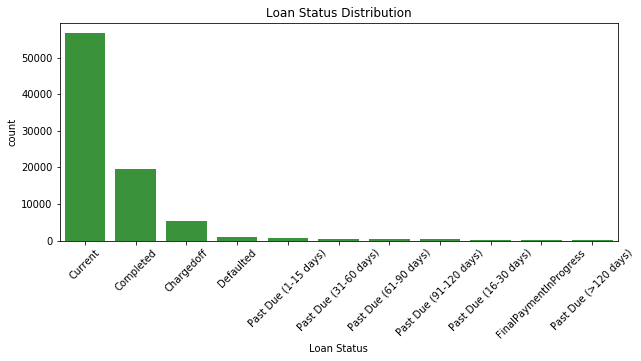

In [11]:
base_color = sns.color_palette()[2]
order = df3['LoanStatus'].value_counts().index
plt.figure(figsize=[10, 4])
sns.countplot(data = df3, x = 'LoanStatus', color = base_color, order = order)
plt.title('Loan Status Distribution')
plt.xticks(rotation = 45)
plt.xlabel('Loan Status');

## Distribution of Original Loan Amount

Amount that borrowed many times are 4500 , 10000 , 15000.

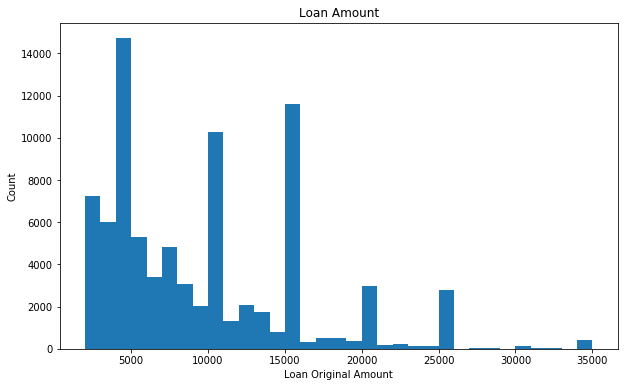

In [12]:
plt.figure(figsize=[10, 6])
bins = np.arange(2000, df3['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df3, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');

##  Loan Origination Year  vs Loan Original Amount

As it shown in the aerly years the borrowed amount was less , the regplot shows that the loan amount is inclined to increase year by year.




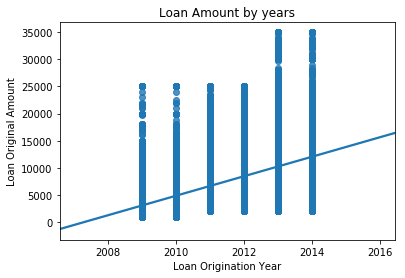

In [13]:
# Creating new columns as  loan rigination year, loan origination month and loan origination day
df3['LoanOriginationYear'] = df3['LoanOriginationDate'].dt.year
df3['LoanOriginationMonth'] = df3['LoanOriginationDate'].dt.month
df3['LoanOriginationDay'] = df3['LoanOriginationDate'].dt.day
# Plotting
sns.regplot(data = df3, x = 'LoanOriginationYear', y = 'LoanOriginalAmount' )
plt.title('Loan Amount by years')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Original Amount');

## Employment Status vs  Borrower Rate

The highest borrower rate are borrowers with Employed and Full-time status.

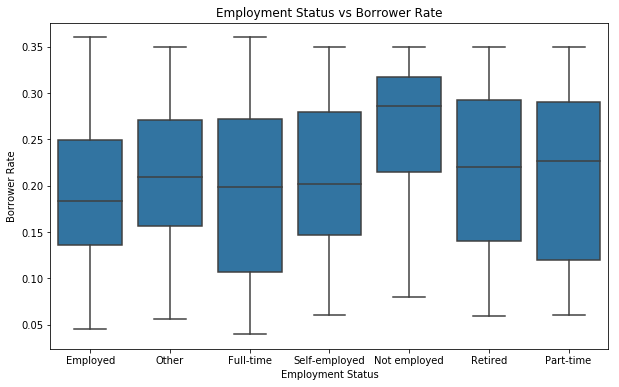

In [14]:
plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[0]
sns.boxplot(data=df3, x='EmploymentStatus', y='BorrowerRate', color=base_color)
plt.title('Employment Status vs Borrower Rate')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate');


## Prosper Rating (Alpha) and  BorrowerAPR vs Term

It is interesting fact that borrower APR decrease with the increase of borrow term, on the other hand , borrower with the rating A and AA in the long term their borrower APR getting increase.

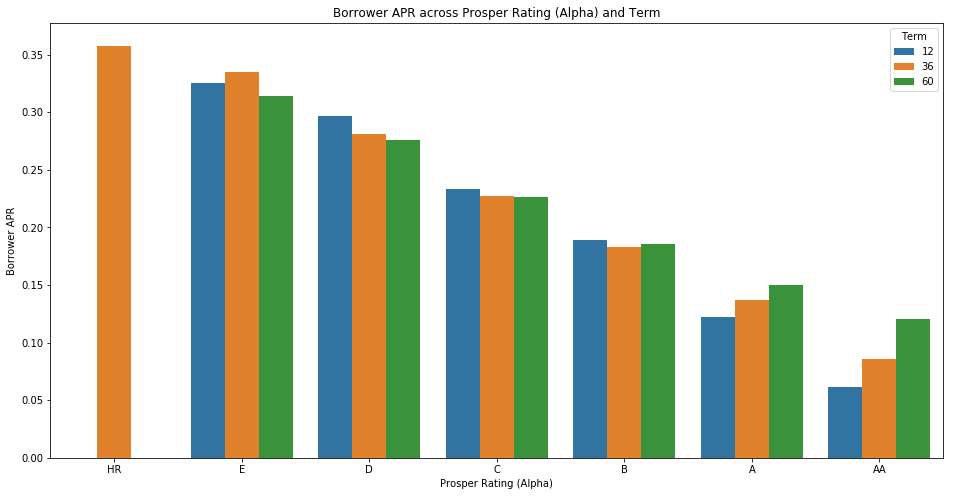

In [15]:
# Creating a sample for further implementation
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 5000, replace = False)
df_subset = df.loc[sample]
# Convert ProsperRating into ordered categorical types
order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order)
df_subset['ProsperRating (Alpha)'] = df_subset['ProsperRating (Alpha)'].astype(ordered_var)
# Plot
plt.figure(figsize = [16, 8])
sns.barplot(data = df_subset, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',order = order, errwidth = 0)
plt.title('Borrower APR across Prosper Rating (Alpha) and Term')
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Borrower APR');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 382575 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 